# Barcodes

Show that barcodes don't matter and that we can pick out when they do.

In [1]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload
import sys
sys.path.append('../../src')
from util import *
from config import *
import generate_dataset
import ipynbname
import plots

### Barcodes comparison scatter plot
- x-axis = barcode1 
- y-axes = barcode2
- fit: 
    - x=y (line of identity)
    - best-fit line
    - Pearson R
- if more than 2 barcode reps then heatmap pearson R everything vs. everything 

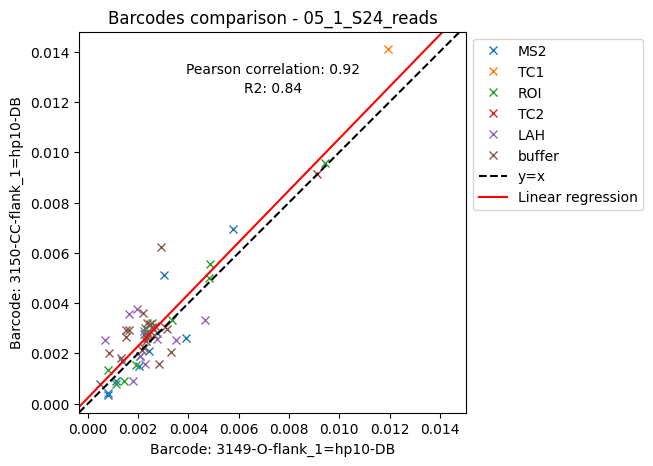

In [2]:

%reload_ext autoreload
for sample in study.get_samples():
    replicates_lists = generate_dataset.generate_barcode_replicates_pairs(study, sample)       
    for construct, replicates in replicates_lists.items():
        for replicate in replicates:
            try:
                plots.barcode_comparison_scatter_plot(study, sample, construct, replicate)
                savefig2(ipynbname.path(), '[A] Barcodes comparison scatter plot/{}'.format(sample) + '/{}_{}'.format(construct, replicate))
            except:
                print('Error in barcode comparison scatter plot: {} {} {}'.format(sample, construct, replicate))
            if not generate_plots:
                break
        if not generate_plots:
            break
    if not generate_plots:
        break

### Combined barcode reps in sample
- x-axis = barcode1/barcode2 names 
- y-axis = pearson R 
- ranked by R
- Or is there a better way to do this–% percent total??


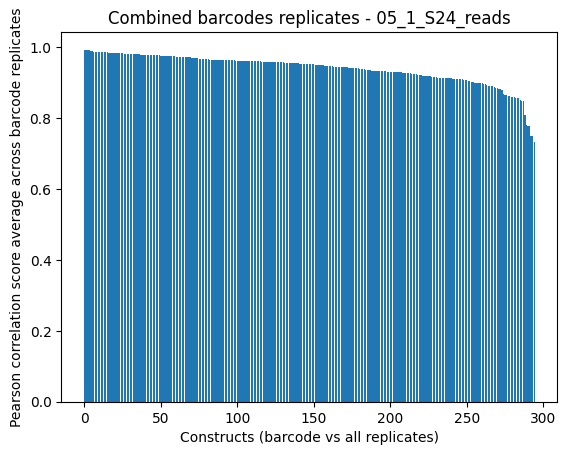

In [3]:
%reload_ext autoreload
for sample in study.get_samples():
    try:
        plots.combined_barcode_replicates_in_sample(study, sample)
        savefig2(ipynbname.path(), '[B] Combined barcode reps in sample/{}'.format(sample))
    except:
        print('Error in combined barcode reps in sample: {}'.format(sample))
    if not generate_plots:
        break